# Numerical Exercises 9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

csv_path = "./CSV/"
plt.rcParams['figure.figsize'] = [6, 6]

n_runs = len(os.listdir(csv_path))

In this exercise I am going to attack the Traveling Salesman Problem (TSP) using a genetic algorithm. The TSP is formulated as follows: 
> *A salesman has to travel $N$ cities with position $\vec c_i$ starting and eventually returning to a base city. Which is the shortest trip he could travel without visiting each city more than once?*

Clearly, we are dealing with an optimization problem, which can be solved quite simply using a genetic algorithm. Such an algorithm has some key differences from a "standard" optimization algorithm (for instance the one I used in Lab8), namely:

- It does not work directly on the parameters, but on a encoding of them
- Does not refine a solution, but rather explores multiple solutions at a time
- Does not need analytical tools but it is purely probabilistic

The detailed functioning of the the algorithm can also be easily schematized:

1. Encode a solution to the given problem into a sequence of characters (*genes*), called *chromosome*.
2. Generate an ensemble of $M$ chromosomes (*population*) with multiple solution of the problem.
3. Evaluate the *fitness* (i.e. the cost function) for each chromosome.
4. Select the *best-fitted* chromosomes and allow them to *crossover* (combine) with probability $p_C$.
5. Create a new population with the crossover results.
6. Allows the new chromosome to *mutate* (i.e. randomly change their sequence) with probability $p_M$.
7. Repeat from 2. $N_{Gen}$ times. 

We therefore need to implement in the code, besides a good encoding for the problem, at least three operators:

1. Selection (point 4.)
2. Crossover (point 4.)
3. Mutation (point 6.)


## 9.1

In the specific case of the TSP problem, the solution encoding is quite straightforward: in fact each chromosome can be represented as sequence of $N$ integers representing the city index in the order they have been visited; then the first element of the chromosome will always be the index of the starting city (for simplicity I used $1$). The fitness parameter can also be defined quite naturally, in fact, since the position of each city is represented as a cartesian vector $\vec c_i$, we can use as fitness the sum of the distances between two sequentially visited cities. In particular, I used as a distance estimator an $L^{(2)}$ norm. In symbols, the fitness of the chromosome $\mathcal{C}$ with sequence $(i_1, i_2,\ldots i_N)$ is given by: 
$$L^{(2)}(\mathcal{C})=\sum_{k=1}^{N}|\vec{c}_{i_{k}}-\vec{c}_{i_{k+1}}|^2$$
When defining the three operators we have less of a natural choice, and the implementation is more free. 
The utilized selection operator works as follows:

1. Order the population by fit (lower fits first)
2. Select the $j$-th element using $j= int(M \times r^p)+1$, where $r$ is a random number in $[0, 1)$ and $M$ is the number of chromosomes in the population.

Then I defined the crossover operator, given a selected mother and father, (e.g. $\left[ 1, 2, 3, 4, 5 \right], \left[ 1, 5, 4, 3, 2 \right] $):
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

And finally the mutation operator, in which I included four different mutations:

1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

After completing the code I ran some simulations with the different placements of $N=34$ cities:

1. Randomly on a circumference
2. Randomly inside a square

Besides testing the correct behavior of the code, these simulation where also useful to tune the user-defined parameters $M$, $N_{Gens}$, $p$, $p_C$, $p_M$.

$M$ and $N_{Gens}$ are the first parameter I tuned. $N_{Gens}$ does not have any special requirements, since, roughly speaking, it does only quantify for how long we let the program run; as in almost any optimization problem, the longest the program runs the better are the results: $N_{Gens}$ should then be sufficiently large. $M$ should also be sufficiently large, but for a different reason: in fact a larger population means a larger number of solutions simultaneously taken into account. Therefore with a large $M$ we may already include in the first generation some very good solutions that the algorithm might otherwise include only after many generations. 

Anyway, by increasing both these two parameters the complexity of the system also increases and thus the execution time. At the end I settled with $M=1000$ and $N_{Gens}=300$.

I then tried to play around a bit with $p_C$, which in theory should be high enough to allow the generation of new individual slightly different from two well-fitted parents but, at the same time, not to high to always destroy the two parents. At the end I found that $p_C=0.5$ was a good choice.

To tune the remaining two parameters, I completed four different runs (which had similar results) and compared their best solution and, more importantly, the evolution in the fit of the best-fitted chromosome and the average of the fits of the best-fitted half population (which is a strong index of the population diversity). These four runs had as parameters:

- A: $p=2.0$, $p_M=0.2$
- B: $p=4.0$, $p_M=0.1$
- C: $p=4.0$, $p_M=0.2$
- D: $p=2.0$, $p_M=0.1$

Before running the simulation, I may stress the expected behavior as these parameter vary:

- An higher value of $p$ implies a stronger bias in the selection of best-fitted individuals; we then expect a faster convergence towards a better solution, but also a reduction in the diversity (half-best and absolute best fit tends to coincide).
- An higher mutation probability leads to an higher diversity, but also tends to destroy the newly generated elements, thus slowing the convergence of the algorithm.

### 9.1.1: Cities placed on a circumference

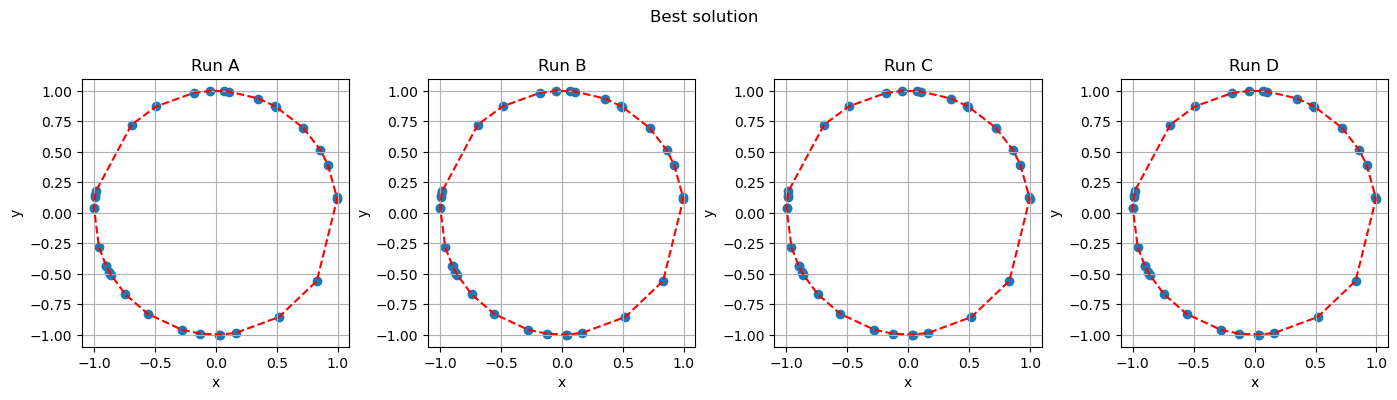

In [9]:
plt.figure().set_size_inches((14, 4))

Titles = ["Run A", "Run B", "Run C", "Run D"]

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1, aspect = 'equal')

    path = csv_path + directory + "/"

    Cities = np.loadtxt(path + "Ex9_1_Cities.csv", delimiter = ',')
    Cities_Coord = Cities[:, 1:]

    Path = np.loadtxt(path + "Ex9_1_Solution.csv", delimiter = ',')
    Path_Coord = []

    for i in Path:
        Path_Coord.append([Cities_Coord[int(i) - 1, 0], Cities_Coord[int(i) - 1, 1]])
    Path_Coord.append([Cities_Coord[0, 0], Cities_Coord[0, 1]])
    
    Path_Coord = np.asarray(Path_Coord)

    plt.scatter(Cities_Coord[:,0], Cities_Coord[:,1])
    plt.plot(Path_Coord[:,0], Path_Coord[:,1], 'r--')
    plt.title(Titles[idx])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

plt.suptitle("Best solution")
plt.tight_layout()
plt.show()

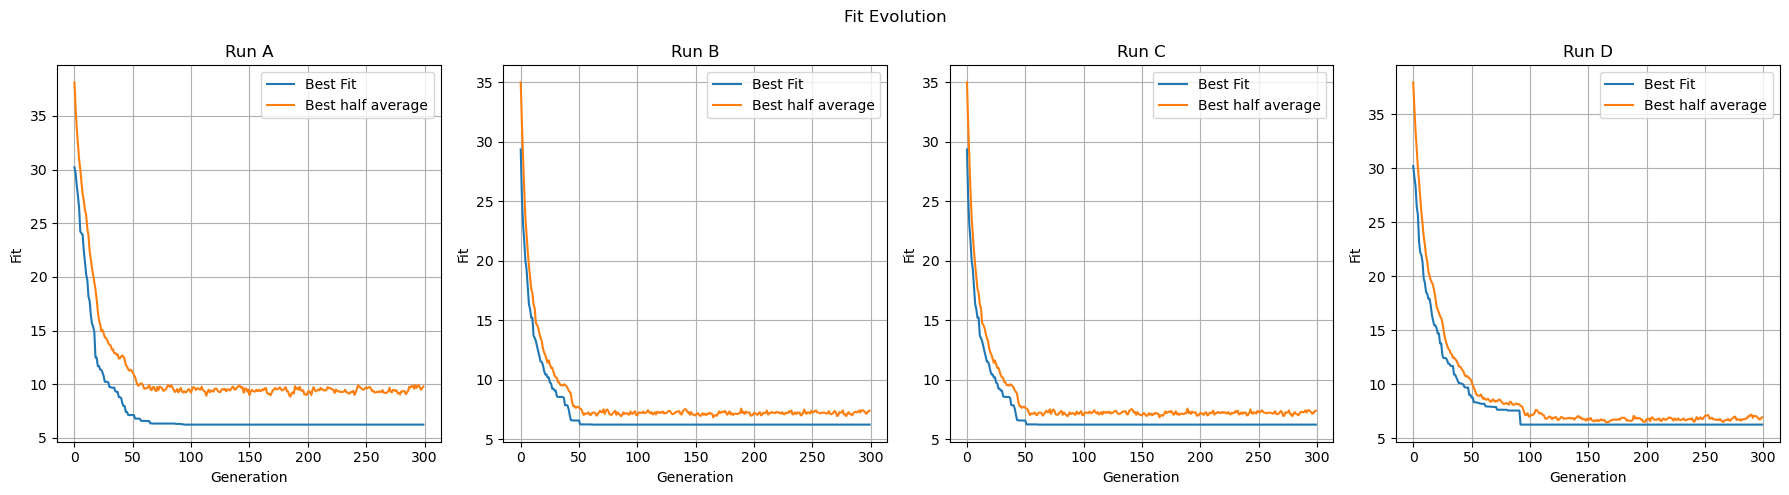

In [12]:
plt.figure().set_size_inches((18, 5))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1)

    path = csv_path + directory + "/"

    Hist = np.loadtxt(path + "Ex9_1_Hist.csv", delimiter = ',')

    plt.plot(Hist[:,0], label = "Best Fit")
    plt.plot(Hist[:,1], label = "Best half average")
    plt.xlabel("Generation")
    plt.ylabel("Fit")
    plt.title(Titles[idx])
    plt.grid(True)
    plt.legend()

plt.suptitle("Fit Evolution")
plt.tight_layout()
plt.show()

### 9.1.2: Cities placed inside a square

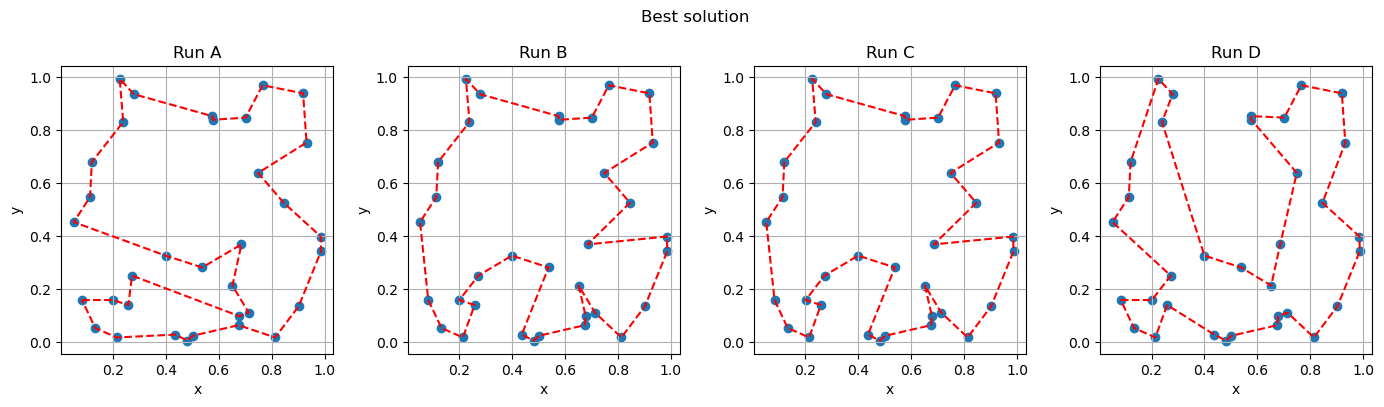

In [16]:
plt.figure().set_size_inches((14, 4))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1, aspect = 'equal')

    path = csv_path + directory + "/"

    Cities = np.loadtxt(path + "Ex9_2_Cities.csv", delimiter = ',')
    Cities_Coord = Cities[:, 1:]

    Path = np.loadtxt(path + "Ex9_2_Solution.csv", delimiter = ',')
    Path_Coord = []

    for i in Path:
        Path_Coord.append([Cities_Coord[int(i) - 1, 0], Cities_Coord[int(i) - 1, 1]])
    Path_Coord.append([Cities_Coord[0, 0], Cities_Coord[0, 1]])
    
    Path_Coord = np.asarray(Path_Coord)

    plt.scatter(Cities_Coord[:,0], Cities_Coord[:,1])
    plt.plot(Path_Coord[:,0], Path_Coord[:,1], 'r--')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(Titles[idx])
    plt.grid(True)

plt.suptitle("Best solution")
plt.tight_layout()
plt.show()

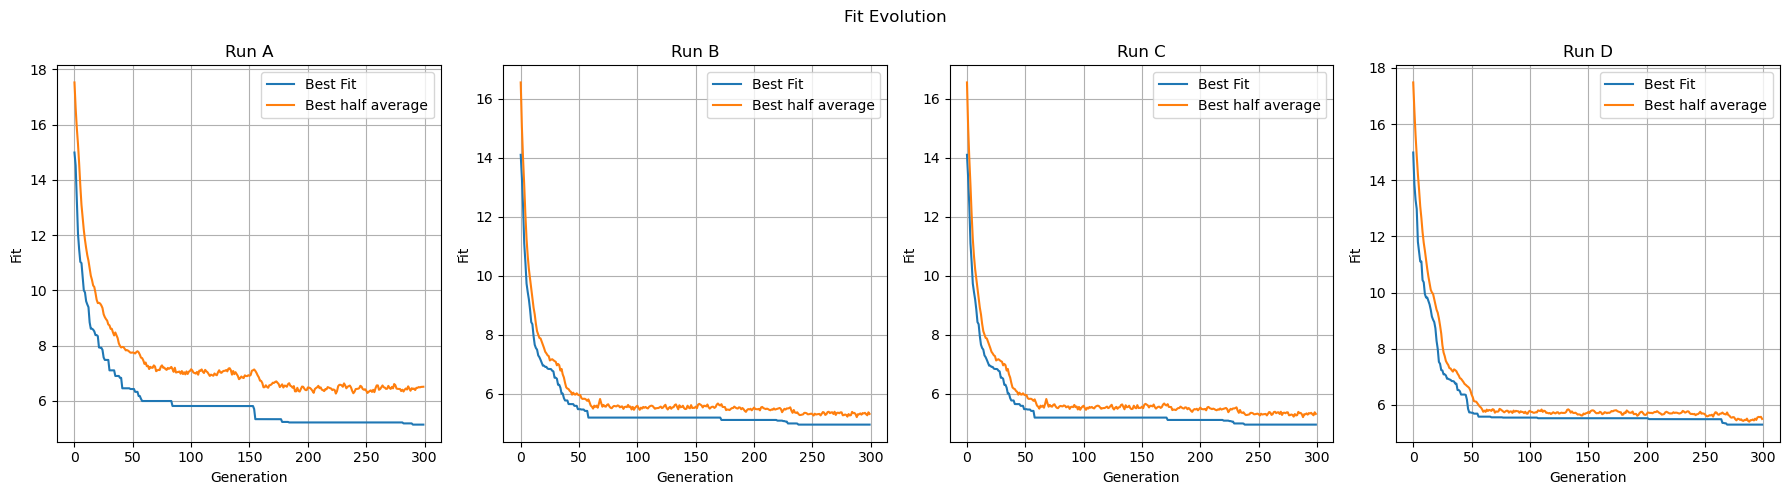

In [15]:
plt.figure().set_size_inches((18, 5))

for idx, directory in enumerate(sorted(os.listdir(csv_path))):
    
    plt.subplot(1, n_runs, idx + 1)

    path = csv_path + directory + "/"

    Hist = np.loadtxt(path + "Ex9_2_Hist.csv", delimiter = ',')

    plt.plot(Hist[:,0], label = "Best Fit")
    plt.plot(Hist[:,1], label = "Best half average")
    plt.xlabel("Generation")
    plt.ylabel("Fit")
    plt.title(Titles[idx])
    plt.grid(True)
    plt.legend()

plt.suptitle("Fit Evolution")
plt.tight_layout()
plt.show()

While with the cities aligned on a circumference we always reach the same solution in all four runs, in the second scenario the result varies between the runs. Anyway, when looking at the half-best and absolute best fit plots we can see that in both cases we have a similar behavior, which can be summed up as follows (as for the final result I am obviously referring to the second scenario):

- In Run A we have a slower convergence than Run D but a higher diversity (correct since $p^{(A)}<p^{(D)}$) .
- Run B and Run C are very similar and also converge to the same solution.
- Run D has the lowest variability (correct since it has the highest $p$ and lower $p_M$) and converges to the best result between the four runs.

In conclusion I may say that the parameter in Run A gave the worst results, since the higher diversity could not be compensated by an high selection bias; the exactly opposite situation is present in Run D, which indeed gave the best results. Anyway, in the letter run, I think that the diversity is reduced too much and may have bad effects in a more complex scenario. Therefore, if I want to maintain the diversity higher without sacrificing a good selection bias, I would go with the parameters used in Run C, which in conclusion are:

- $M=1000$
- $N_{Gens}=300$
- $p_C=0.5$
- $p_M=0.2$
- $p=4.0$

